#**SENTIMENT ANALYSIS OF WIKIPEDIA DATA**

In [ ]:
!pip install -U mwclient
!pip install -U transformers

In [ ]:
import mwclient
import time
from transformers import pipeline
from multiprocessing import Pool
from statistics import mean
import pandas as pd
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Accessing the data wikipedia page of Bitcoin
site = mwclient.Site("en.wikipedia.org")
page = site.pages["Bitcoin"]
page_content = page.text()
print(page_content)

In [ ]:
#Accessing the list of revisions
revs = list(page.revisions())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Sorting the revisions by their dates
revs= sorted(revs, key=lambda rev: rev["timestamp"])
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [ ]:
#function to analyse the sentiment of any given text
sentiment_pipeline = pipeline("sentiment-analysis")

def find_sentiment(text):
    sent= sentiment_pipeline([text[0:250]])[0]
    score = sent["score"]
    if(sent["label"] == "NEGATIVE"):
        score *= -1
    return score

In [ ]:
#This code iterates over all the edits made on the wikipedia page of Bitcoin and stores their sentiment value in edits dictionary
edits = {}

for rev in revs:
    date = time.strftime("%Y-%m-%d", rev["timestamp"])
    if date not in edits:
        edits[date] = dict(sentiments=list(), edit_count=0)

    edits[date]["edit_count"] += 1

    comment = rev.get("comment", "")
    edits[date]["sentiments"].append(find_sentiment(comment))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Here all the sentiments of the same day are averaged to give the average sentiment of that day
#We have also captured the negative sentiments of the people based on their edits of that day
for key in edits:
    if len(edits[key]["sentiments"])>0:
        edits[key]["mean_sentiment"]=mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"]= len([s for s in edits[key]["sentiments"] if s<0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["mean_sentiment"]=0
        edits[key]["neg_sentiment"]=0
    del edits[key]["sentiments"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits['2009-03-08']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'edit_count': 4, 'mean_sentiment': -0.5505250245332718, 'neg_sentiment': 0.75}

In [ ]:
edits_df = pd.DataFrame.from_dict(edits, orient="index")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df.index = pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dates = pd.date_range(start="2009-03-08",end=datetime.today())
dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-17', '2023-06-18', '2023-06-19',
               '2023-06-20', '2023-06-21'],
              dtype='datetime64[ns]', length=5219, freq='D')

In [ ]:
#The data of sentiment is filled arranged according to the dates and the dates with no sentiments have zero stored in them
edits_df = edits_df.reindex(dates, fill_value=0)
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,mean_sentiment,neg_sentiment
2009-03-08,4,-0.550525,0.75
2009-03-09,0,0.000000,0.00
2009-03-10,0,0.000000,0.00
2009-03-11,0,0.000000,0.00
2009-03-12,0,0.000000,0.00
...,...,...,...
2023-06-17,0,0.000000,0.00
2023-06-18,0,0.000000,0.00
2023-06-19,0,0.000000,0.00
2023-06-20,0,0.000000,0.00


In [ ]:
#This creates a new dataset which stores the average value of the past 30 days thereby removing the noise
rolling_edits = edits_df.rolling(30, min_periods=30).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits = rolling_edits.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Mean Sentiment')

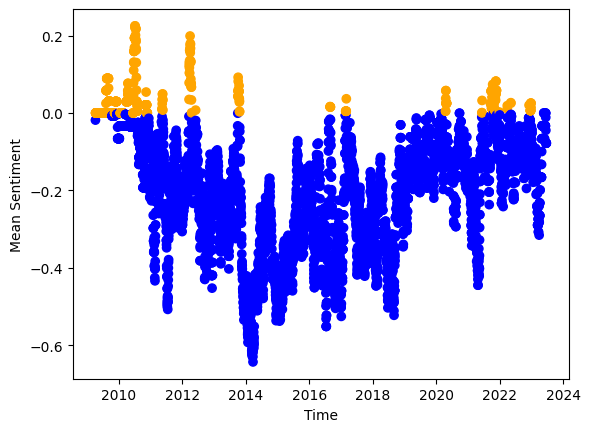

In [ ]:
thresholds = [-1,0,1]
colors = ['red', 'blue', 'orange']
set_colors = np.digitize(rolling_edits['mean_sentiment'],thresholds)
scatter_colors = [colors[idx] for idx in set_colors]
plt.scatter(rolling_edits.index, rolling_edits['mean_sentiment'], c=scatter_colors)
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.title('Graph of Mean Sentiment vs Time')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Negative Sentiment')

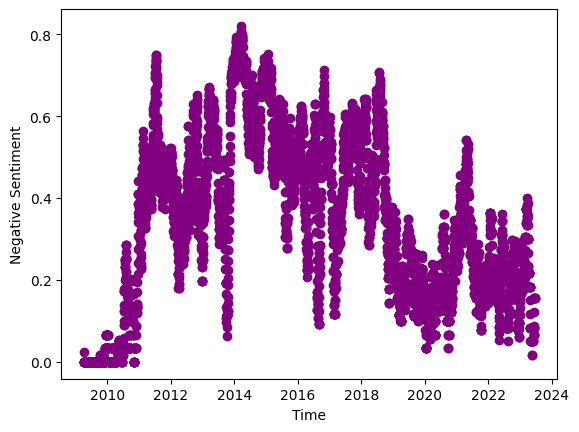

In [ ]:
plt.scatter(rolling_edits.index, rolling_edits['neg_sentiment'],color='Purple' )
plt.xlabel('Time')
plt.ylabel('Negative Sentiment')
plt.title('Graph of Negative Sentiment vs Time')

In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,mean_sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-06-17,0.333333,-0.077991,0.155556
2023-06-18,0.333333,-0.077991,0.155556
2023-06-19,0.333333,-0.077991,0.155556
2023-06-20,0.333333,-0.077991,0.155556


In [ ]:
rolling_edits.to_csv("wikipedia_edits.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
